First exercise: count the number of lines in Python for each file

In [1]:
import os
print os.getcwd()

/Users/Anuta/Amadeus_test


In [ ]:
1-st approach

In [5]:
import time
filename='test_files/bookings.csv'
def linecount_1(filename):
    return len(open(filename).readlines(  ))

print("Starting")
start = time.clock(  )
print linecount_1(filename)
stend = time.clock(  )
thetime = stend-start
print 'Time ',thetime

Starting
10000011
Time  28.528563


In [ ]:
2-nd approach

In [2]:
import time
filename='test_files/bookings.csv'
def linecount_2( ):
    n=10
    count = 0
    for line in open(filename).xreadlines(  ): count += 1
    return count

print("Starting")
start = time.clock(  )

print linecount_2( )
stend = time.clock(  )
thetime = stend-start
print 'Time ',thetime

done
10000011
4.521256


In [ ]:
3-d approach

In [22]:
import time
filename='test_files/bookings.csv'
def linecount_3(filename):
    count = 0
    thefile = open(filename)
    while 1:
        buffer = thefile.read(65536)
        if not buffer: break
        count += buffer.count('\n')
    return count
print("Starting")
start = time.clock(  )
print linecount_3(filename)
stend = time.clock(  )
thetime = stend-start
print 'Time ',thetime

done
10000011
5.8194


In [4]:
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
def linecount_4(filename):
    return pd.read_csv(filename, sep="^" ).shape[0]+1
print("Starting")
start = time.clock(  )    
filename='test_files/bookings.csv'
print linecount_4(filename)
stend = time.clock(  )
thetime = stend-start
print 'Time ',thetime

10000011
176.282287


In [ ]:
4-th approach

In [13]:
from pandas import DataFrame, read_csv
import time
import matplotlib.pyplot as plt
import pandas as pd 

filename='test_files/bookings.csv'
start = time.clock(  )    
D=pd.read_csv(filename, sep="^" )
D1= pd.DataFrame(D.groupby('arr_port')['pax'].sum()).sort('pax', ascending =[0])
print("Starting")
stend = time.clock(  )
thetime = stend-start
print D1[:10]
D1[:10].to_csv('test_files/dict2.csv', sep=',')


            pax
arr_port       
LHR       88809
MCO       70930
159.815484
<class 'pandas.core.frame.DataFrame'>


/Users/Anuta/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [1]:
import gc
gc.collect()

179

1   2013  AGP     9633
2   2013  AGP     8379
3   2013  AGP    10659
4   2013  AGP     8265
5   2013  AGP    10830
6   2013  AGP     7923
7   2013  AGP     8892
8   2013  AGP     7866
9   2013  AGP     8151
10  2013  AGP     6499
11  2013  AGP     6384
12  2013  AGP     3696
dtype: int64


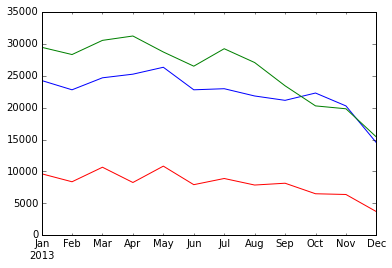

In [9]:
import pandas as pd
from pandas import *
filename='test_files/searches.csv'
#filename='Documents/test_files/2.csv'
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
LARGE_FILE = filename
CHUNKSIZE = 100000 # processing 100,000 rows at a time

def process_frame(df, dest):
        return df.loc[df['Destination'] == dest][['Destination','Date']]

#reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE )
reader = pd.read_csv(LARGE_FILE, chunksize=CHUNKSIZE, sep='^')#, index_col='Destination' )

Ndf=pd.DataFrame() 
Pdf=pd.DataFrame()
Adf=pd.DataFrame()
r= Ndf.empty
for df in reader:
    if Ndf.empty:
        Ndf=process_frame(df, 'MAD')
        Pdf=process_frame(df, 'BCN') 
        Adf=process_frame(df, 'AGP') 
         #print Ndf.columns
    else:
        Ndf=Ndf.append(process_frame(df, 'MAD'), ignore_index =True)
        Pdf=Pdf.append(process_frame(df, 'BCN'), ignore_index =True)
        Adf=Adf.append(process_frame(df, 'AGP'), ignore_index =True)
        #print Ndf.shape
#print Ndf.head()
#print Ndf.shape
#Ndf.index=Ndf['Date']
Ndf['Date']=pd.to_datetime(Ndf['Date'], unit='ms')
Pdf['Date']=pd.to_datetime(Pdf['Date'], unit='ms')
Adf['Date']=pd.to_datetime(Adf['Date'], unit='ms')
#print Ndf.head()
Ndf['Date']=pd.to_datetime(Ndf['Date'],format='%Y-%m-%d')
Pdf['Date']=pd.to_datetime(Pdf['Date'],format='%Y-%m-%d')
Adf['Date']=pd.to_datetime(Adf['Date'],format='%Y-%m-%d')
Ndf.index=Ndf['Date']
Pdf.index=Pdf['Date']
Adf.index=Adf['Date']
#Ndf.set_index(pd.DatetimeIndex(Ndf['Date']))
print pd.groupby(Adf,by=[Adf.index.month, Adf.index.year], as_index=True)['Destination'].value_counts()
ts= TimeSeries(pd.groupby(Ndf,by=[Ndf.index.month, Ndf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()
ts= TimeSeries(pd.groupby(Pdf,by=[Pdf.index.month, Pdf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()
ts= TimeSeries(pd.groupby(Adf,by=[Adf.index.month, Adf.index.year], as_index=True)['Destination'].value_counts().tolist(), period_range('2013-01', periods=12, freq='M'))
ts.plot()

#TT=pd.DataFrame(pd.groupby(Ndf,by=[Ndf.index.month])['Destination'].value_counts().tolist(), index=Ndf['Date'])
#print TT
#FF=Ndf.groupby(pd.Grouper(key='Date',freq='M'))['Destination '].value_counts()
